In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
class Enviornment(object):

  def __init__(self, reward_probs, actual_reward):
    if len(reward_probs) != len(actual_reward):
      raise Exception (f'size of reward probs: {len(reward_probs)} does not match size of actual rewards: {len(actual_reward)}')

    self.reward_probs = reward_probs
    self.actual_reward = actual_reward
    self.k_arms = len(reward_probs)

  
  #pull/choose an ARM
  def choose_arm(self, arm_number):
    if arm_number<0 or arm_number>=self.k_arms:
      raise Exception (f'arm_number should be bewteen 0 and {self.k_arms-1}')

    # generate random number and compare
    rand = random.random()
    #print(rand)

    if rand < self.reward_probs[arm_number]:
      return self.actual_reward[arm_number]
    else:
      return 0


In [3]:
reward_probs = [0.62, 0.05, 0.87, 0.49]
actual_reward = [1, 1, 1, 1]

env = Enviornment(reward_probs, actual_reward)

In [4]:
simulate = [env.choose_arm(0) for j in range(10)]
print(simulate)
print(sum(simulate))

[1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
8


**Incremental vs Stepwise Averaging**

In [5]:
#Incremental Averaging

a1, a2, a3 = 5, 5, 5

prev_avg = 5
population_avg = 6
avg_list1 = [5, 5, 5]

for j in range(3, 50):
  
  new_avg = prev_avg + (1/j)*(population_avg-prev_avg)
  prev_avg = new_avg
  avg_list1.append(new_avg)



# Stepwise Averaging

avg_list2 = [5, 5, 5]
prev_avg = 5
population_avg = 6

for j in range(3, 50):
  new_avg = prev_avg + 0.9*(population_avg-prev_avg)
  prev_avg = new_avg
  avg_list2.append(new_avg)

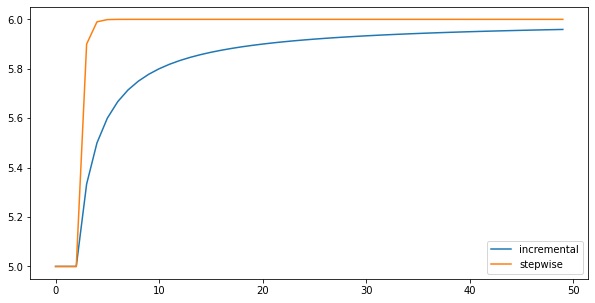

In [24]:
plt.rcParams["figure.figsize"] = (10, 5)

plt.plot(avg_list1, label = 'incremental')
plt.plot(avg_list2, label = 'stepwise')
plt.legend()
plt.show()

#Stepwise does well bcoz as j increase to infinity, the second term has less importance when we multiply by (1/j)* ERROR

**Implementing a Random Behaving Agent**

In [7]:
class RandomAgent(object):

  def __init__(self, env, max_iterations = 500):
    self.env = env
    self.iterations = max_iterations

    self.q_values = np.zeros(self.env.k_arms)
    self.arm_counts = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0]
    self.cum_rewards = [0]


  def agent_act(self):
    for j in range(self.iterations):
      #choose random arm
      arm = np.random.choice(self.env.k_arms)

      #pull arm to get a generate number and get a Reward
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm]+1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm]+(1/self.arm_counts[arm])* (reward - self.q_values[arm])
      # self.q_values[arm] = self.q_values[arm]+(0.9)* (reward - self.q_values[arm])

      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards)/len(self.rewards))

    return {'return_counts': self.arm_counts, 'rewards': self.rewards, 'cum_rewards': self.cum_rewards}


In [8]:
test_env = Enviornment(reward_probs, actual_reward)
random_agent = RandomAgent(test_env)

results_random = random_agent.agent_act()

In [9]:
print('Random Agent q_values:', random_agent.q_values)
print('Total wins out of 500:', sum(random_agent.rewards))
cum_reward_random = results_random['cum_rewards']
arm_counts_random = results_random['return_counts']

Random Agent q_values: [0.62992126 0.06060606 0.87272727 0.48854962]
Total wins out of 500: 248


Text(0.5, 1.0, 'RANDOM AGENT (EXPLORATION = 100%)')

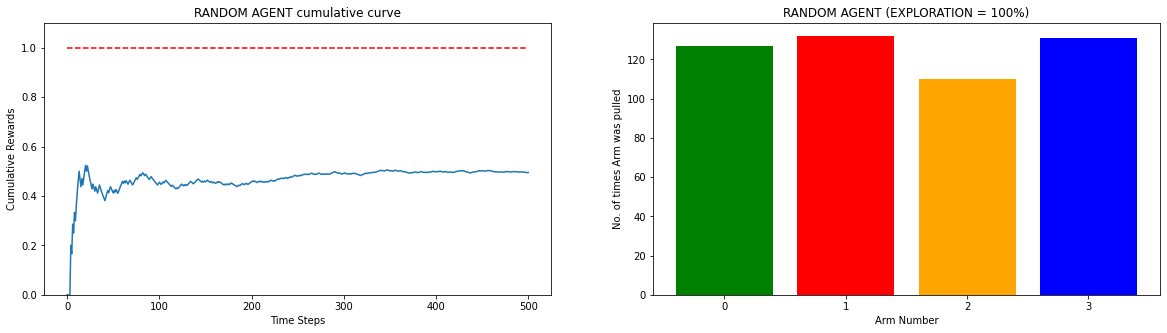

In [10]:
fig = plt.figure(figsize = [20, 5])


ax1 = fig.add_subplot(121)
ax1.plot(cum_reward_random)
ax1.hlines(1, 0, 500, color = 'red', linestyle = 'dashed')
ax1.set_ylim(0,1.1)
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('RANDOM AGENT cumulative curve')



ax2 = fig.add_subplot(122)
ax2.bar([0, 1, 2, 3], arm_counts_random, color = ['green', 'red', 'orange', 'blue'])
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xlabel('Arm Number')
ax2.set_ylabel('No. of times Arm was pulled')
ax2.set_title('RANDOM AGENT (EXPLORATION = 100%)')


**Implementing a Greedy Agent**

In [11]:
class GreedyAgent(object):

  def __init__(self, env, max_iterations = 500):
    self.env = env
    self.iterations = max_iterations

    self.q_values = np.zeros(self.env.k_arms)
    self.arm_counts = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0]
    self.cum_rewards = [0]


  def agent_act(self):
    for j in range(self.iterations):
      #choose random arm
      #for GREEDY changed here
      arm = np.argmax(self.q_values)

      #pull arm to get a generate number and get a Reward
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm]+1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm]+(1/self.arm_counts[arm])* (reward - self.q_values[arm])
      # self.q_values[arm] = self.q_values[arm]+(0.9)* (reward - self.q_values[arm])

      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards)/len(self.rewards))

    return {'return_counts': self.arm_counts, 'rewards': self.rewards, 'cum_rewards': self.cum_rewards}


In [12]:
test_env = Enviornment(reward_probs, actual_reward)
greedy_agent = GreedyAgent(test_env)

results_greedy = greedy_agent.agent_act()

In [13]:
print('Random Agent q_values:', greedy_agent.q_values)
print('Total wins out of 500:', sum(greedy_agent.rewards))
cum_reward_greedy = results_greedy['cum_rewards']
arm_counts_greedy = results_greedy['return_counts']

Random Agent q_values: [0.574 0.    0.    0.   ]
Total wins out of 500: 287


Text(0.5, 1.0, 'GREEDY AGENT (EXPLOITATION = 100%)')

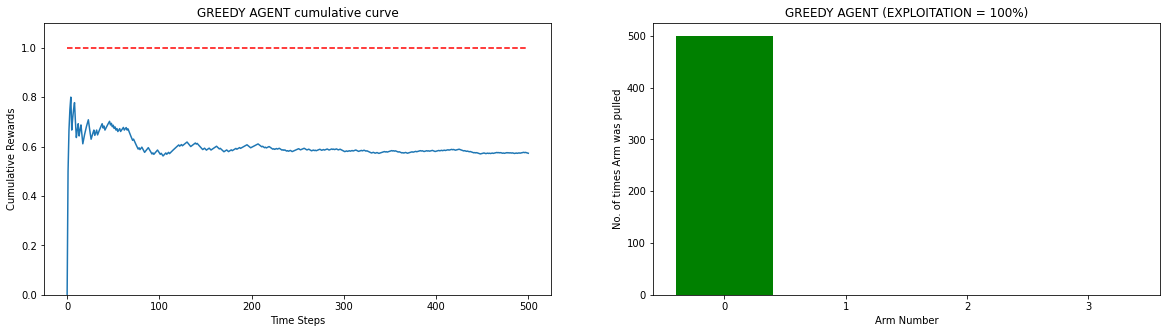

In [14]:
fig = plt.figure(figsize = [20, 5])


ax1 = fig.add_subplot(121)
ax1.plot(cum_reward_greedy)
ax1.hlines(1, 0, 500, color = 'red', linestyle = 'dashed')
ax1.set_ylim(0,1.1)
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('GREEDY AGENT cumulative curve')

ax2 = fig.add_subplot(122)
ax2.bar([0, 1, 2, 3], arm_counts_greedy, color = ['green', 'red', 'orange', 'blue'])
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xlabel('Arm Number')
ax2.set_ylabel('No. of times Arm was pulled')
ax2.set_title('GREEDY AGENT (EXPLOITATION = 100%)')

**EPSILON GREEDY**

In [15]:
class EpsilonGreedyAgent(object):

  def __init__(self, env, max_iterations, epsilon, decay):
    self.env = env
    self.iterations = max_iterations
    self.epsilon = epsilon
    self.decay = decay

    self.q_values = np.zeros(self.env.k_arms)
    self.arm_counts = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0]
    self.cum_rewards = [0]


  def agent_act(self):
    for j in range(self.iterations):

      #choose random arm
      #for EPSILON GREEDY changed here
      # change epsilon = 1 for Random Agent
      # change epsilon = 0 for Greedy Agent
      
      rand = np.random.random()

      if self.decay == 'yes':
        self.epsilon_d = self.epsilon - (j*self.epsilon/self.iterations)
      else:
        self.epsilon_d = self.epsilon

      if rand < self.epsilon_d:
        arm = np.random.choice(self.env.k_arms)
      else:
        arm = np.argmax(self.q_values)


      #pull arm to get a generate number and get a Reward
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm]+1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm]+(1/self.arm_counts[arm])* (reward - self.q_values[arm])
      # self.q_values[arm] = self.q_values[arm]+(0.9)* (reward - self.q_values[arm])

      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards)/len(self.rewards))

    return {'return_counts': self.arm_counts, 'rewards': self.rewards, 'cum_rewards': self.cum_rewards}


In [16]:
test_env = Enviornment(reward_probs, actual_reward)

epsilon_greedy_agent = EpsilonGreedyAgent(test_env, max_iterations = 500, epsilon = 0.1, decay='no')
results_epsilon_greedy = epsilon_greedy_agent.agent_act()

cum_reward_epsilon_greedy = results_epsilon_greedy['cum_rewards']
print(len(cum_reward_epsilon_greedy))

501


In [17]:
print('Random Agent q_values:', epsilon_greedy_agent.q_values)
print('Total wins out of 500:', sum(epsilon_greedy_agent.rewards))
cum_reward_epsilon_greedy = results_epsilon_greedy['cum_rewards']
arm_counts_epsilon_greedy = results_epsilon_greedy['return_counts']

Random Agent q_values: [0.625      0.         0.87794433 0.63636364]
Total wins out of 500: 422


Text(0.5, 1.0, 'EPSILON GREEDY AGENT')

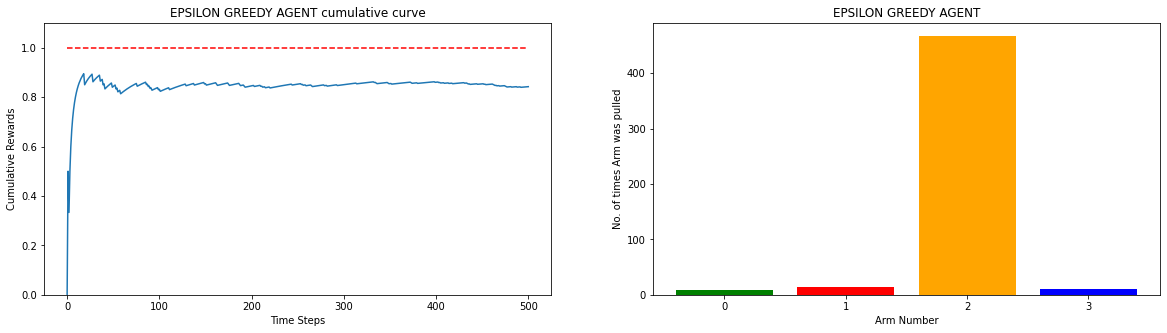

In [18]:
fig = plt.figure(figsize = [20, 5])


ax1 = fig.add_subplot(121)
ax1.plot(cum_reward_epsilon_greedy)
ax1.hlines(1, 0, 500, color = 'red', linestyle = 'dashed')
ax1.set_ylim(0,1.1)
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('EPSILON GREEDY AGENT cumulative curve')

ax2 = fig.add_subplot(122)
ax2.bar([0, 1, 2, 3], arm_counts_epsilon_greedy, color = ['green', 'red', 'orange', 'blue'])
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xlabel('Arm Number')
ax2.set_ylabel('No. of times Arm was pulled')
ax2.set_title('EPSILON GREEDY AGENT')

**UCB AGENT**

In [30]:
class UCBAgent(object):

  def __init__(self, env, max_iterations, c):
    self.env = env
    self.iterations = max_iterations
    self.c = c

    self.q_values = np.zeros(self.env.k_arms)
    self.arm_counts = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0]
    self.cum_rewards = [0]


  def agent_act(self):
    for j in range(self.iterations):
      
      #UCB
      #select atleast each ARM once then go for exploration
      if j < len(self.arm_counts):
        arm = j
      else:
        U = self.c * np.sqrt(np.log(j)/self.arm_counts)
        arm = np.argmax(self.q_values + U)

      #pull arm to get a generate number and get a Reward
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm]+1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm]+(1/self.arm_counts[arm])* (reward - self.q_values[arm])
      # self.q_values[arm] = self.q_values[arm]+(0.9)* (reward - self.q_values[arm])

      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards)/len(self.rewards))

    return {'return_counts': self.arm_counts, 'rewards': self.rewards, 'cum_rewards': self.cum_rewards}


In [32]:
test_env = Enviornment(reward_probs, actual_reward)

ucb_agent = UCBAgent(test_env, max_iterations = 500, c = 2)
results_ucb = ucb_agent.agent_act()

cum_reward_ucb = results_ucb['cum_rewards']
arm_counts_ucb = results_ucb['return_counts']
print(len(cum_reward_ucb))

501


Text(0, 0.5, 'No. of times Arm was pulled')

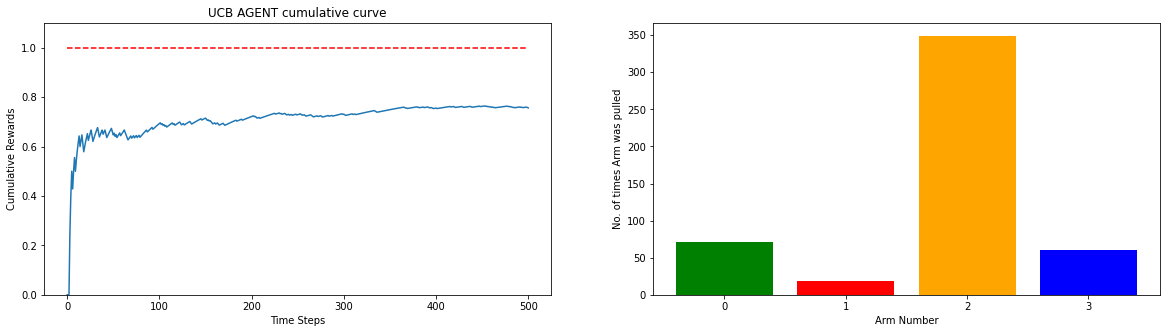

In [33]:
fig = plt.figure(figsize = [20, 5])


ax1 = fig.add_subplot(121)
ax1.plot(cum_reward_ucb)
ax1.hlines(1, 0, 500, color = 'red', linestyle = 'dashed')
ax1.set_ylim(0,1.1)
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('UCB AGENT cumulative curve')

ax2 = fig.add_subplot(122)
ax2.bar([0, 1, 2, 3], arm_counts_ucb, color = ['green', 'red', 'orange', 'blue'])
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xlabel('Arm Number')
ax2.set_ylabel('No. of times Arm was pulled')

**Comparing ALL AGENTS**

In [52]:
#RANDOM AGENT

test_env = Enviornment(reward_probs, actual_reward)

random_agent = RandomAgent(test_env)
results_random = random_agent.agent_act()

cum_reward_random = results_random['cum_rewards']
print(sum(random_agent.rewards))

238


In [53]:
#GREEDY AGENT

test_env = Enviornment(reward_probs, actual_reward)

greedy_agent = GreedyAgent(test_env)
results_greedy = greedy_agent.agent_act()

cum_reward_greedy = results_greedy['cum_rewards']
print(sum(greedy_agent.rewards))

302


In [54]:
#e-GREEDY AGENT

test_env = Enviornment(reward_probs, actual_reward)

epsilon_greedy_agent = EpsilonGreedyAgent(test_env, max_iterations = 500, epsilon = 0.1, decay='no')
results_epsilon_greedy = epsilon_greedy_agent.agent_act()

cum_reward_epsilon_greedy = results_epsilon_greedy['cum_rewards']
print(sum(epsilon_greedy_agent.rewards))

394


In [55]:
#e-GREEDY with Decay AGENT

test_env = Enviornment(reward_probs, actual_reward)

epsilon_greedy_agent_with_decay = EpsilonGreedyAgent(test_env, max_iterations = 500, epsilon = 0.1, decay='yes')
results_epsilon_greedy_with_decay = epsilon_greedy_agent_with_decay.agent_act()

cum_reward_epsilon_greedy_with_decay = results_epsilon_greedy_with_decay['cum_rewards']
print(sum(epsilon_greedy_agent_with_decay.rewards))

413


In [59]:
#UCB AGENT

test_env = Enviornment(reward_probs, actual_reward)

ucb_agent = UCBAgent(test_env, max_iterations = 500, c = 0.7)
results_ucb = ucb_agent.agent_act()

cum_reward_ucb = results_ucb['cum_rewards']
print(sum(ucb_agent.rewards))

428


Text(0.5, 1.0, 'Reward Comparison')

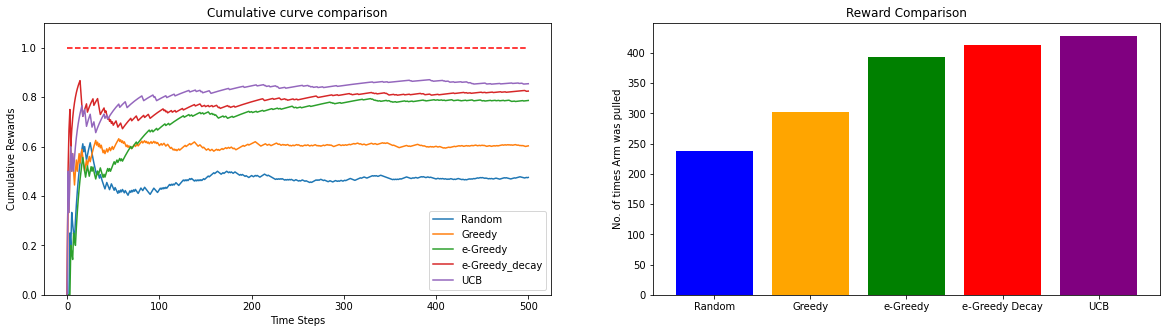

In [60]:
fig = plt.figure(figsize = [20, 5])


ax1 = fig.add_subplot(121)


ax1.plot(cum_reward_random, label = 'Random')
ax1.plot(cum_reward_greedy, label = 'Greedy')
ax1.plot(cum_reward_epsilon_greedy, label = 'e-Greedy')
ax1.plot(cum_reward_epsilon_greedy_with_decay, label = 'e-Greedy_decay')
ax1.plot(cum_reward_ucb, label = 'UCB')

ax1.hlines(1, 0, 500, color = 'red', linestyle = 'dashed')
ax1.set_ylim(0,1.1)
ax1.legend(loc = "lower right")
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Cumulative curve comparison')


ax2 = fig.add_subplot(122)
ax2.bar(['Random', 'Greedy', 'e-Greedy', 'e-Greedy Decay', 'UCB'], [sum(random_agent.rewards), sum(greedy_agent.rewards),
                                                             sum(epsilon_greedy_agent.rewards), sum(epsilon_greedy_agent_with_decay.rewards), sum(ucb_agent.rewards)], 
                                                              color = ['blue', 'orange', 'green', 'red', 'purple'])
ax2.set_ylabel('No. of times Arm was pulled')
ax2.set_title('Reward Comparison')
